# DATA UNDERSTANDING

| Variable         | Description                                       |
|------------------|---------------------------------------------------|
| user_id          | Unique identifier for each client                 |
| REGION           | The location of each client                       |
| TENURE           | Duration in the network                           |
| MONTANT          | Top-up amount                                     |
| FREQUENCE_RECH   | Number of times the customer refilled             |
| REVENUE          | Monthly income of each client                     |
| ARPU_SEGMENT     | Income over 90 days / 3                           |
| FREQUENCE        | Number of times the client has made an income     |
| DATA_VOLUME      | Number of connections                            |
| ON_NET           | Inter expresso call                               |
| ORANGE           | Call to orange                                    |
| TIGO             | Call to Tigo                                      |
| ZONE1            | Call to zones1                                    |
| ZONE2            | Call to zones2                                    |
| MRG              | A client who is going                             |
| REGULARITY       | Number of times the client is active for 90 days |
| TOP_PACK         | The most active packs                             |
| FREQ_TOP_PACK    | Number of times the client has activated the top pack packages |
| CHURN            | Variable to predict - Target                      |


## Exploratory Data Analysis

In [1]:
# System Libraries
import os
import sys

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Statistics Libraries
from scipy.stats import spearmanr, chi2_contingency

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (RobustScaler, LabelEncoder, FunctionTransformer,
                                   StandardScaler, OneHotEncoder, PolynomialFeatures)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Metrics Libraries
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, auc)

# Utility Libraries
import warnings
import joblib

# Custom Settings
warnings.filterwarnings("ignore")

# Define custom color palette
custom_palette = {"Positive": "Blue", "Negative": "Orange"}


In [2]:
#load Data
df = pd.read_csv('../datasets/Train.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


### Univariate Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


### Insights

1. **Right-Skewed Distributions**: Features like MONTANT, REVENUE, and DATA_VOLUME are highly skewed, with a few extreme high values influencing the mean. Most values are concentrated at lower ranges.
2. **High Variability**: Features such as FREQUENCE_RECH, ON_NET, and DATA_VOLUME show significant variability, suggesting diverse customer behaviors.
3. **Feature Spread**: Features like ARPU_SEGMENT and FREQ_TOP_PACK have a wide range, indicating variability in customer spending and usage.
4. **Imbalance in Target Variable**: The CHURN variable is highly imbalanced, with only 19% of customers classified as churn.

### Summary

- **Distribution Skewness**: Many numerical features have right-skewed distributions, with a few high values affecting overall statistics.
- **Variability**: High variability in features like DATA_VOLUME and FREQUENCE_RECH suggests a wide range of customer activities.
- **Imbalance**: The target variable CHURN is imbalanced, which could affect model performance.

### Actions to be Taken

1. **Handle Skewed Distributions**:
   - **Transformation**: Apply transformations like log or square root to normalize highly skewed features.
   - **Feature Engineering**: Create new features or bins to handle extreme values and better represent the majority of data.

2. **Address High Variability**:
   - **Outlier Treatment**: Consider methods to handle outliers, such as capping or removing extreme values, especially for features with high variability.
   - **Feature Scaling**: Apply scaling techniques to standardize features and improve model performance.

3. **Manage Target Imbalance**:
   - **Resampling Techniques**: Use oversampling (e.g., SMOTE) or undersampling methods to balance the target variable.
   - **Algorithmic Adjustments**: Use algorithms that are robust to class imbalance or adjust class weights to improve performance on minority class.

4. **Feature Engineering**:
   - **Create New Features**: Derive new features or aggregate existing ones to better capture customer behaviors.
   - **Interaction Terms**: Explore interactions between features to uncover relationships affecting the target variable.

These actions will help in preparing the data for modeling and improving the performance and interpretability of the machine learning models.

In [4]:
df.shape

(1077024, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

### Data Overview and Actions

Here’s a summary based on the DataFrame structure and the non-null counts for each column:

#### ** Data Types**

- **Object Types**: `user_id`, `REGION`, `TENURE`, `MRG`, `TOP_PACK`
- **Numeric Types**: `float64` for most features, `int64` for `REGULARITY` and `CHURN`

#### Actions to be Taken

1. **Handling Missing Values**:
  
2. **Data Type Conversion**:
  
3. **Feature Scaling and Handling Imbalance**:
   

df.info

In [6]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [8]:
Q1 = df['REVENUE'].quantile(0.25)
Q3 = df['REVENUE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['REVENUE'] < lower_bound) | (df['REVENUE'] > upper_bound)]
outliers_iqr


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
18,6efe4ce5b4dab4cc86cd708152da3e5dd4072784,DAKAR,K > 24 month,71000.0,14.0,72280.0,24093.0,81.0,4123.0,178.0,1167.0,229.0,3.0,NaN,NO,62,IVR Echat_Daily_50F,79.0,0
63,f4529416580a67912d7853298fb19a48e2a5fd13,DAKAR,K > 24 month,19500.0,40.0,20001.0,6667.0,44.0,19615.0,6706.0,600.0,178.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,20.0,0
81,585d82a19f6ff688a6aa946f3a2acac7e1accaba,DAKAR,K > 24 month,19500.0,39.0,20000.0,6667.0,40.0,NaN,92.0,451.0,67.0,NaN,NaN,NO,60,All-net 500F=2000F;5d,40.0,0
96,0213c60b5c89bf577adcdf8d1eec2008d2cc9137,DAKAR,K > 24 month,19200.0,38.0,19198.0,6399.0,40.0,6147.0,551.0,1153.0,63.0,NaN,NaN,NO,56,Jokko_Daily,36.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076871,04bf4aa82ea7b480c8557c83beee8bfa23d0e16c,DAKAR,K > 24 month,22450.0,39.0,23949.0,7983.0,43.0,4439.0,634.0,277.0,143.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,40.0,0
1076907,54c7e5499bfbfa62bad5961e3e2f16256da60f7f,THIES,K > 24 month,16000.0,27.0,17502.0,5834.0,35.0,9878.0,326.0,249.0,38.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,26.0,0
1076915,6dcdaaa8f8d2f81888eaeacc6c7ff7c22f1fb721,DAKAR,K > 24 month,31000.0,15.0,29050.0,9683.0,44.0,80216.0,4.0,83.0,1.0,1.0,NaN,NO,47,"Data:200F=Unlimited,24H",19.0,0
1076917,73af253c36a7af5d60cebdc99fd28aeb9ddb06d6,KAOLACK,K > 24 month,24200.0,46.0,25200.0,8400.0,47.0,1.0,160.0,846.0,9.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,46.0,0


In [9]:
from scipy import stats

# Compute Z-scores
df['Z_REVENUE'] = stats.zscore(df['REVENUE'].dropna())
outliers_z = df[df['Z_REVENUE'].abs() > 3]
outliers_z


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Z_REVENUE
18,6efe4ce5b4dab4cc86cd708152da3e5dd4072784,DAKAR,K > 24 month,71000.0,14.0,72280.0,24093.0,81.0,4123.0,178.0,1167.0,229.0,3.0,NaN,NO,62,IVR Echat_Daily_50F,79.0,0,9.305670
122,57c91aed042cc0005dcff978d1c7967697ce7d5d,DAKAR,K > 24 month,27000.0,26.0,27499.0,9166.0,26.0,0.0,40.0,653.0,199.0,NaN,NaN,NO,62,All-net 1000=5000;5d,24.0,0,3.064955
133,0ab3254ac2acf61f6e9e11c1dbb020025ce78dfe,DAKAR,K > 24 month,27000.0,49.0,28417.0,9472.0,66.0,51996.0,95.0,126.0,21.0,NaN,NaN,NO,62,"Data:490F=1GB,7d",46.0,0,3.192888
201,cfaad3e965ef8de61a3e100b215ffa70b6c979c0,SAINT-LOUIS,K > 24 month,31300.0,46.0,32501.0,10834.0,48.0,603.0,1890.0,767.0,269.0,1.0,NaN,NO,61,MIXT:500F= 2500F on net _2500F off net;2d,31.0,0,3.762037
202,428e888d1d8ec08d5611d695159a984d119a75ff,DAKAR,K > 24 month,33500.0,52.0,35500.0,11833.0,55.0,NaN,442.0,663.0,89.0,45.0,NaN,NO,62,All-net 500F=2000F;5d,58.0,0,4.179980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076733,b504f4c1ed18e447b623d413105d593b0dcbdaa8,TAMBACOUNDA,K > 24 month,39000.0,36.0,37609.0,12536.0,38.0,1.0,1933.0,238.0,2.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,20.0,0,4.473892
1076763,a48d6243e7e3877c3c7c8332d849210534fae676,SAINT-LOUIS,K > 24 month,26000.0,46.0,28000.0,9333.0,48.0,NaN,113.0,531.0,123.0,12.0,NaN,NO,62,All-net 500F=2000F;5d,55.0,0,3.134774
1076841,153c26560ee3a06b70d479a951360e1fb40c15b0,NaN,K > 24 month,26200.0,45.0,27199.0,9066.0,48.0,1.0,1731.0,294.0,157.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,38.0,0,3.023146
1076864,02716f078f82d2f6a99ad0dbc0afdf26163738d3,DAKAR,H 15-18 month,29800.0,97.0,30898.0,10299.0,90.0,20963.0,122.0,187.0,6.0,NaN,5.0,NO,62,"Data: 200 F=100MB,24H",85.0,0,3.538642


### Data Description


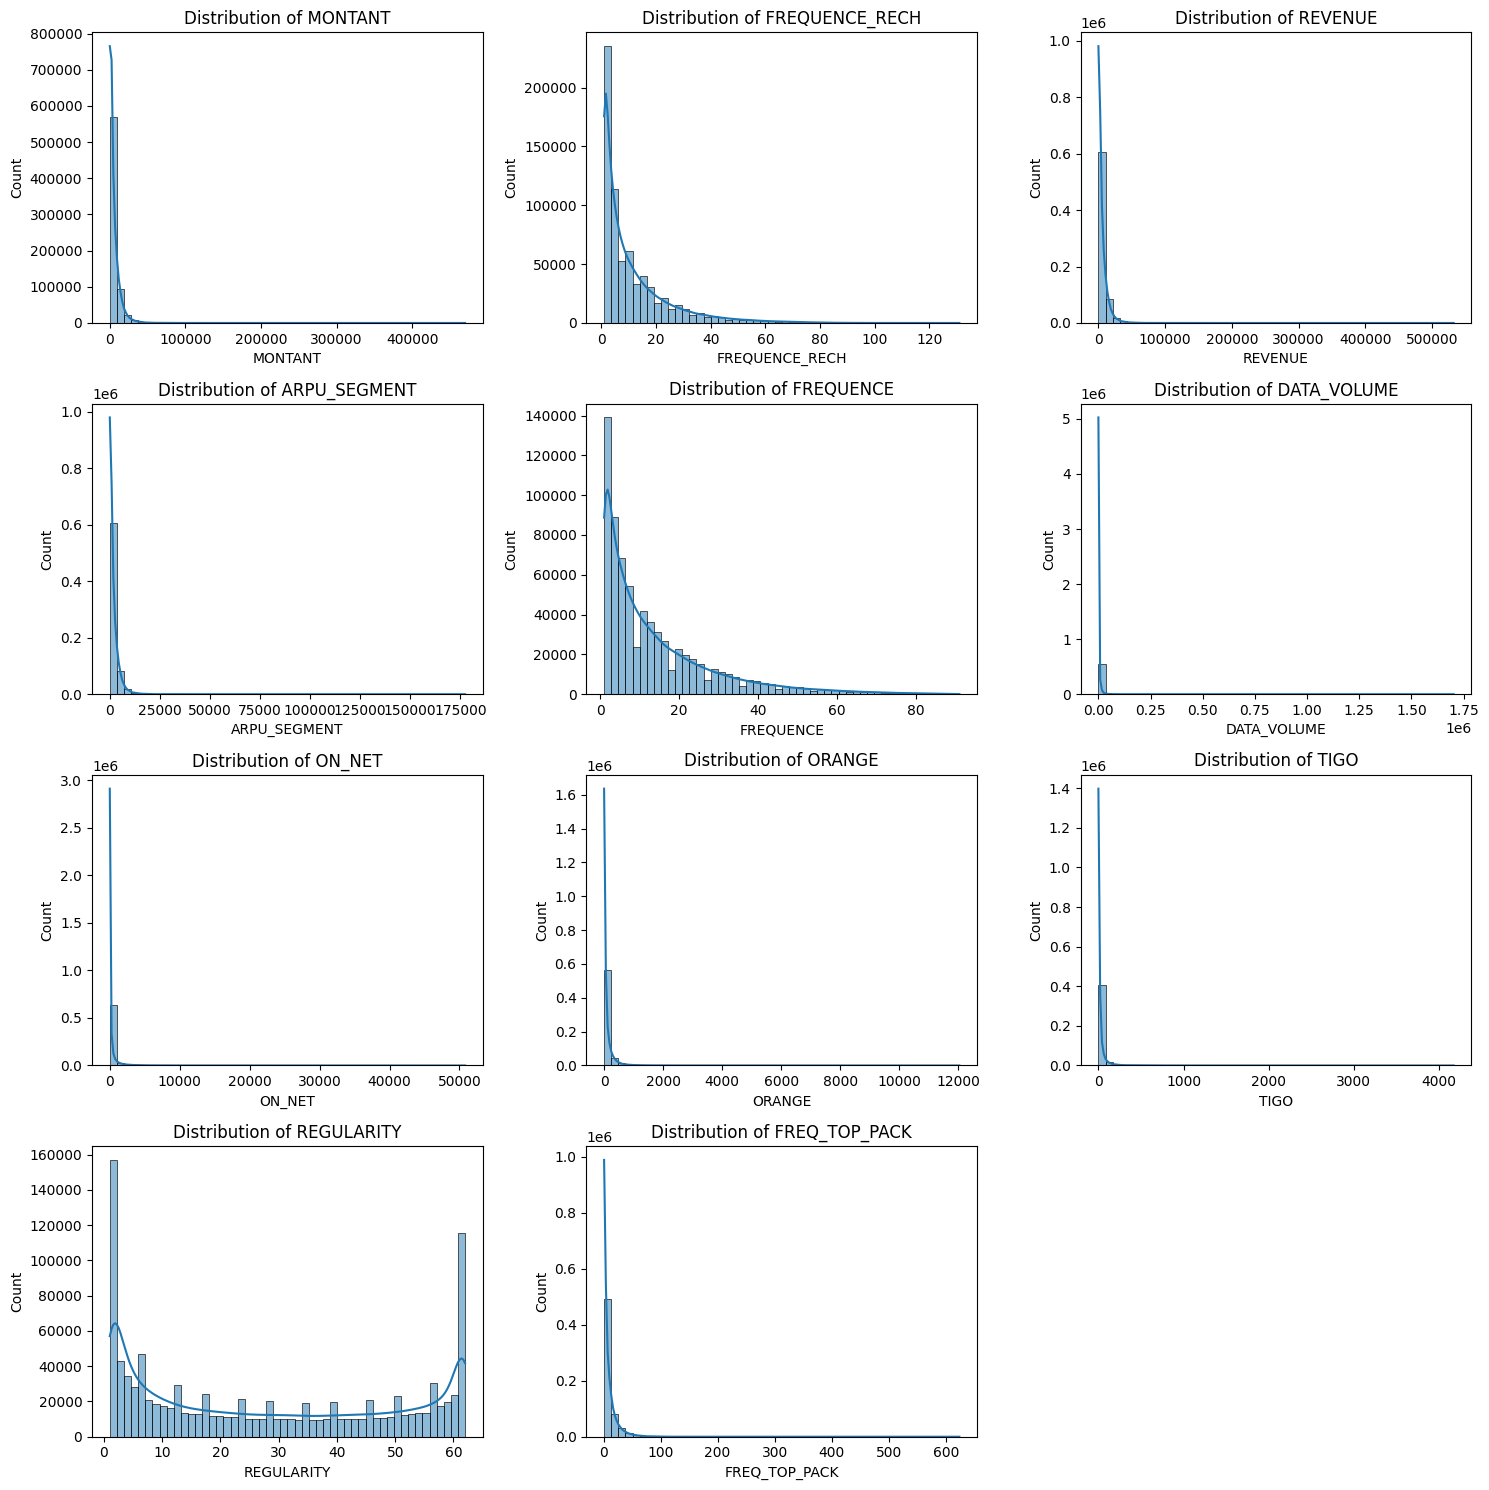

In [10]:
# Plot histograms for numerical features
numerical_features = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


- **Insight**: The number of times a customer is active over 90 days (`REGULARITY`) shows a bimodal distribution, indicating two distinct groups of customers. Apart from this, the rest are right skewed.
- **Action**: Investigating the reasons behind the bimodal distribution which might be useful to create segments based on this feature.


### **General Actions for All Features**
- **Handling Skewness**: For features that are highly right-skewed, log transformations will be applied to normalize the distributions. This can help improve the performance of machine learning models.
- **Outliers**: The presence of high-value outliers in many features suggests that careful handling of outliers is needed,  through transformation.



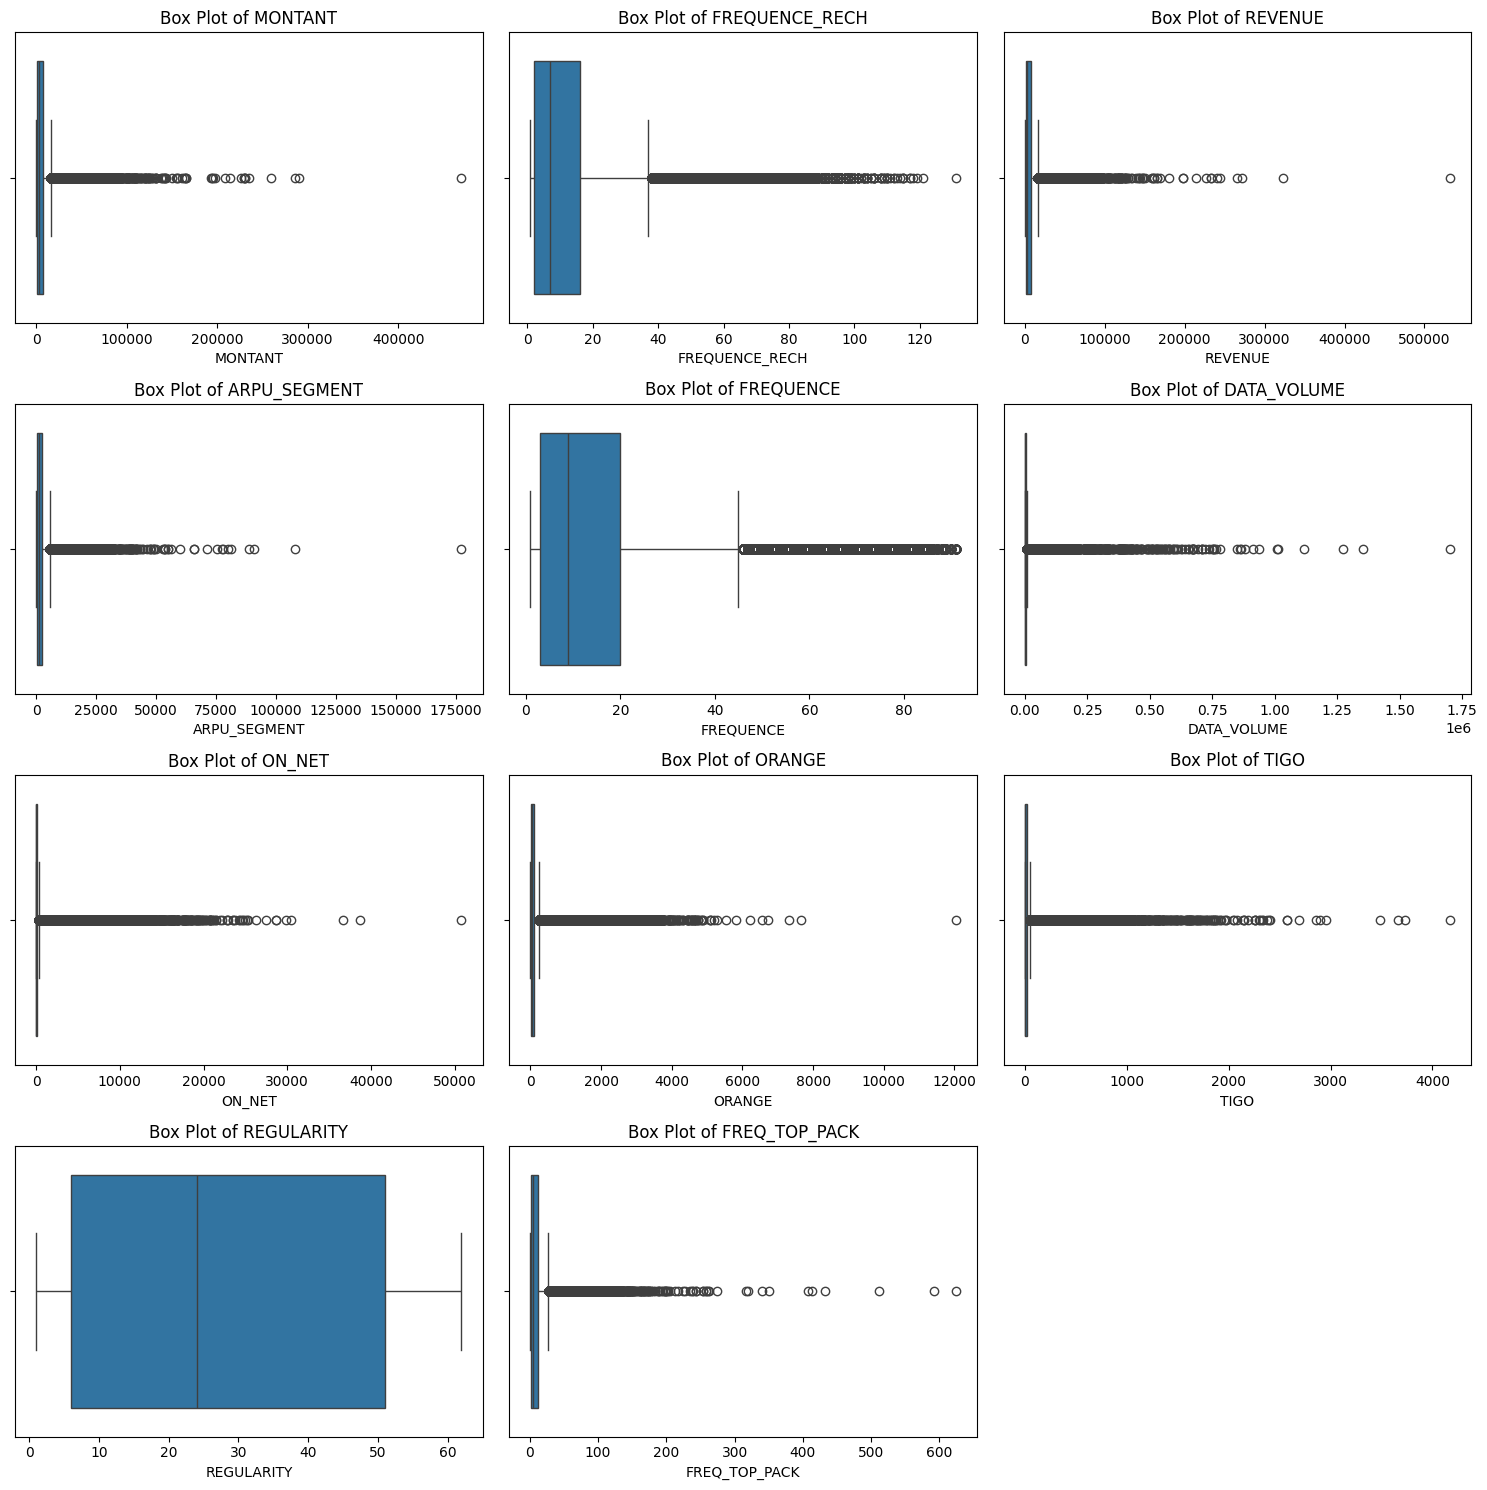

In [11]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


The box plots provide a clear visualization of the distribution and outliers for various numerical features. L

### Insights

1. **MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, FREQUENCE, DATA_VOLUME, ON_NET, ORANGE, TIGO, FREQ_TOP_PACK**:
    - These features exhibit a high number of outliers, with values significantly higher than the majority of data points.
    - The data is highly skewed towards the lower end, with a long tail of high values.

2. **REGULARITY**:
    - This feature has a more balanced distribution, though there are still some extreme values.
    - The majority of users fall within the lower to mid range of the distribution, with a noticeable peak at the higher end (around 60).


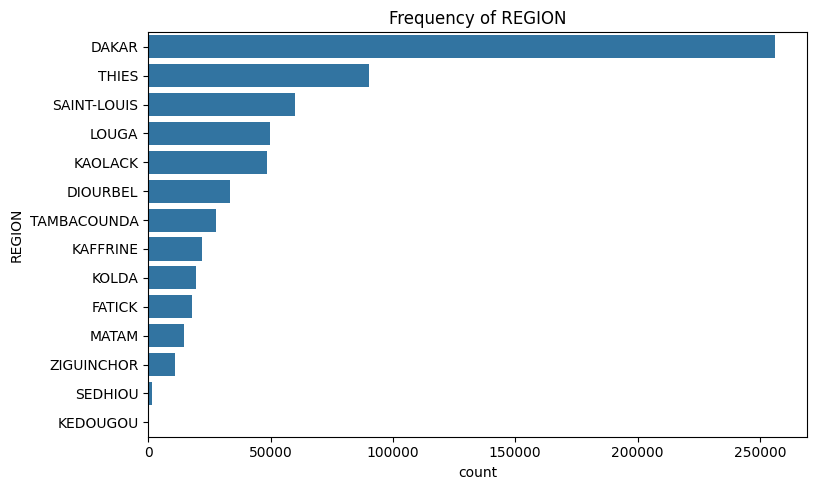

In [12]:
# Plot bar plots for categorical features
categorical_features = ['REGION']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
plt.tight_layout()
plt.show()


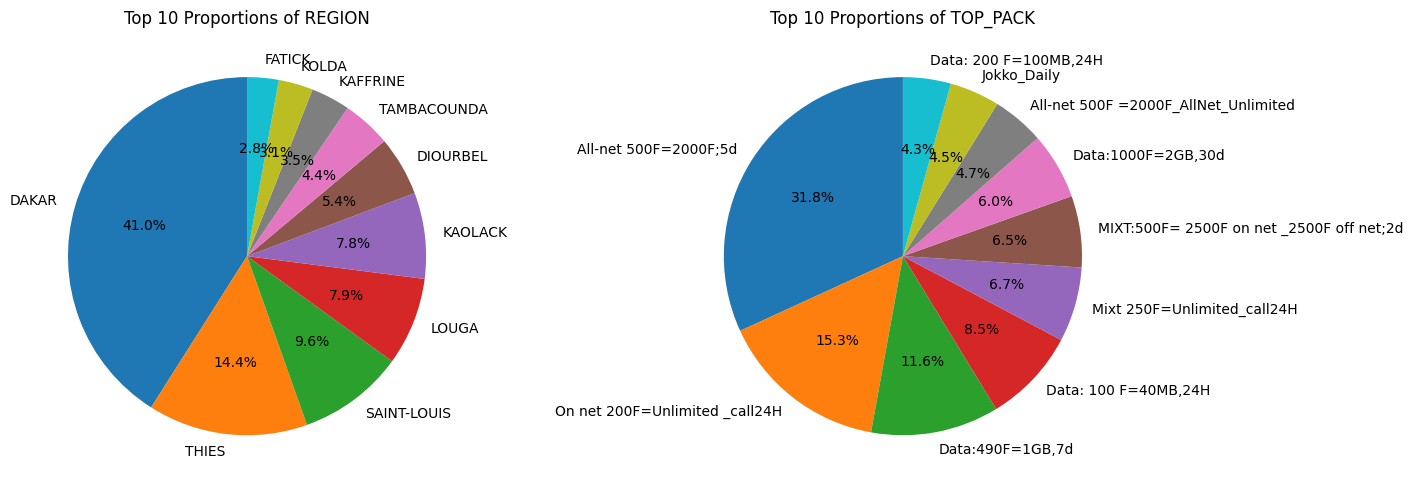

In [13]:
categorical_features = ['REGION', 'TOP_PACK']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    counts = df[feature].value_counts().head(10)  # Limit to top 10 categories
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 10 Proportions of {feature}')
plt.tight_layout()
plt.show()

In [14]:
# Print value counts for categorical features
for feature in categorical_features:
    print(f'\nValue Counts for {feature}:\n', df[feature].value_counts())



Value Counts for REGION:
 REGION
DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: count, dtype: int64

Value Counts for TOP_PACK:
 TOP_PACK
All-net 500F=2000F;5d             158779
On net 200F=Unlimited _call24H     76302
Data:490F=1GB,7d                   57679
Data: 100 F=40MB,24H               42515
Mixt 250F=Unlimited_call24H        33620
                                   ...  
YMGX on-net 100=700F, 24H              1
301765007                              1
1500=Unlimited7Day                     1
APANews_monthly                        1
200=unlimited pilot auto               1
Name: count, Length: 126, dtype: int64


### BiVariate Analysis

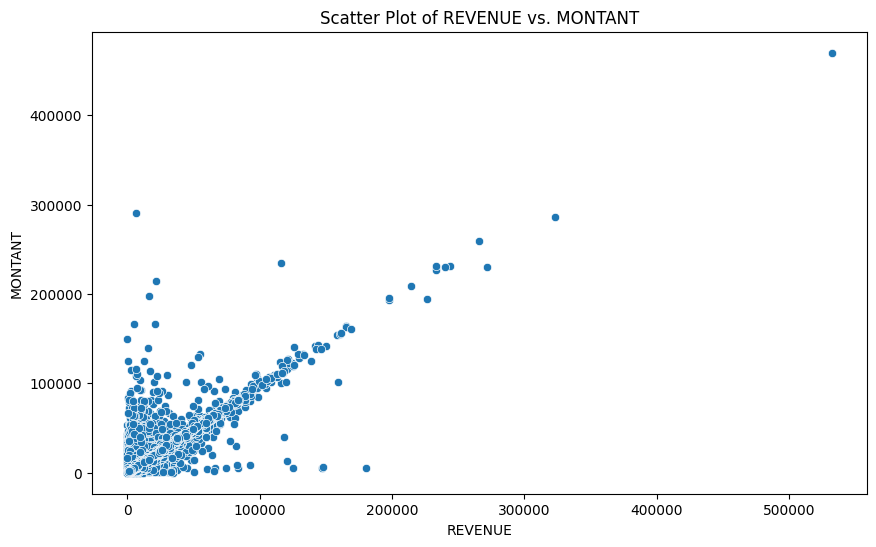

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between REVENUE and MONTANT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='REVENUE', y='MONTANT', data=df)
plt.title('Scatter Plot of REVENUE vs. MONTANT')
plt.xlabel('REVENUE')
plt.ylabel('MONTANT')
plt.show()


**Insights Generated:**

1. **Positive Correlation Between Revenue and Montant:**
   - It was observed that there is a general positive correlation between REVENUE and MONTANT, as most data points trend upward along with both axes. This indicates that as the revenue increases, the montant (possibly a measure of transaction value or customer spending) also tends to increase.

2. **Clustered Data:**
   - A significant concentration of data points was noted in the lower range of both REVENUE and MONTANT, suggesting a large number of low-value transactions or customers.

3. **Outliers:**
   - A few outliers were identified with significantly high values for both REVENUE and MONTANT. This suggests the presence of high-value customers or transactions, which may require special consideration or separate analysis.


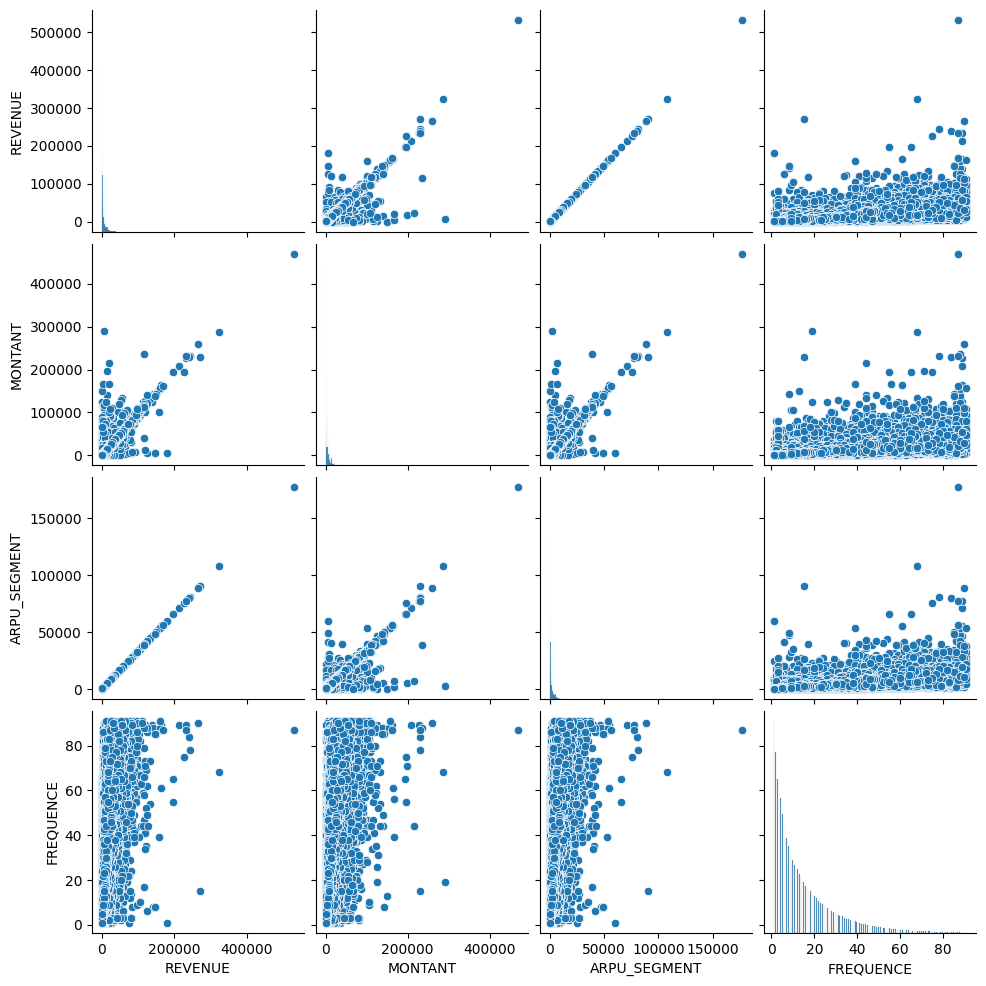

In [16]:
# Example: Pair plot for selected numerical features
numerical_features = ['REVENUE', 'MONTANT', 'ARPU_SEGMENT', 'FREQUENCE']
sns.pairplot(df[numerical_features].dropna())
plt.show()


The scatter plot matrix (pair plot) provides insights into the relationships between `REVENUE`, `MONTANT`, `ARPU_SEGMENT`, and `FREQUENCE`. Here's what we can infer:

### Insights

1. **REVENUE vs. MONTANT**:
    - There is a positive correlation between `REVENUE` and `MONTANT`, suggesting that higher `MONTANT` generally corresponds to higher `REVENUE`.
    - The relationship is strong but not perfectly linear, with some scatter indicating variability.

2. **REVENUE vs. ARPU_SEGMENT**:
    - There is a clear linear relationship between `REVENUE` and `ARPU_SEGMENT`, indicating that these features are highly correlated.
    - This strong correlation suggests that `ARPU_SEGMENT` is a good predictor of `REVENUE`.

3. **MONTANT vs. ARPU_SEGMENT**:
    - Similar to `REVENUE`, `MONTANT` and `ARPU_SEGMENT` also show a strong positive correlation.
    - This indicates that users who spend more (`MONTANT`) belong to higher ARPU segments.

4. **REVENUE vs. FREQUENCE**:
    - The scatter plot shows a concentration of points at lower `FREQUENCE` values, with some variability in `REVENUE`.
    - There is no clear linear relationship between these two variables.

5. **MONTANT vs. FREQUENCE**:
    - Similar to the previous plot, there is no clear pattern between `MONTANT` and `FREQUENCE`.
    - Most data points are concentrated at lower `FREQUENCE` values, with some spread in `MONTANT`.

6. **ARPU_SEGMENT vs. FREQUENCE**:
    - This plot shows a scattered distribution with no clear relationship.
    - The `FREQUENCE` is mostly low across all `ARPU_SEGMENT` values, indicating that frequency of recharge is not strongly related to the ARPU segment.




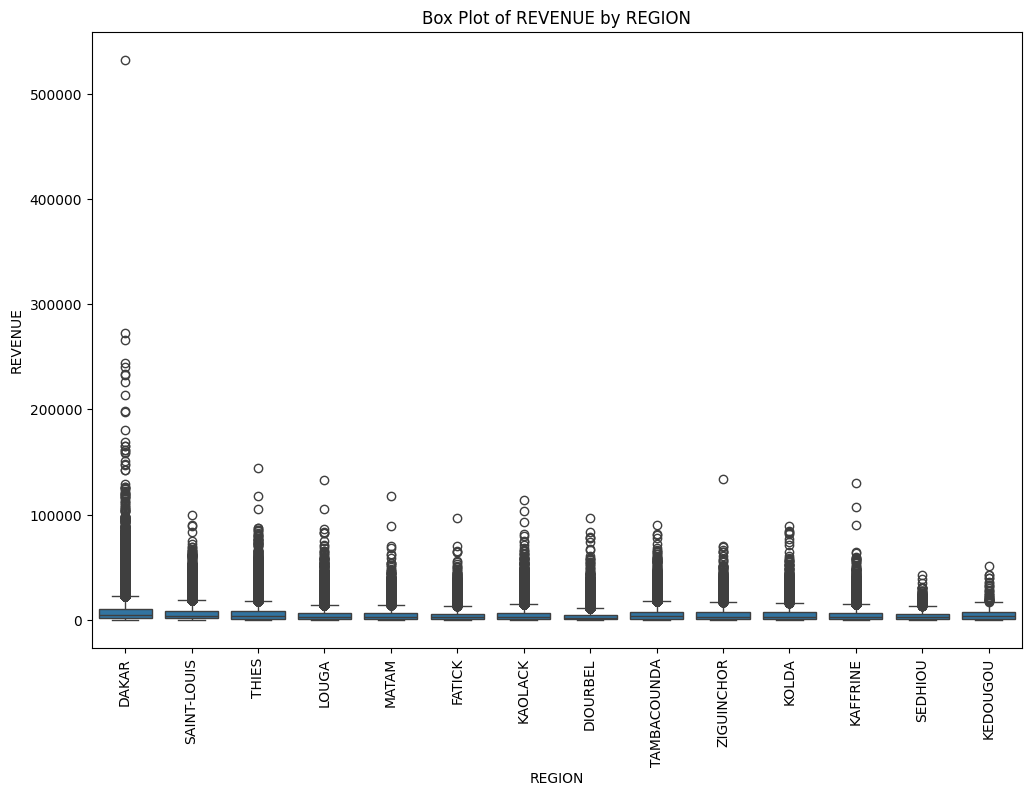

In [17]:
# Example: Box plot of REVENUE by REGION
plt.figure(figsize=(12, 8))
sns.boxplot(x='REGION', y='REVENUE', data=df)
plt.title('Box Plot of REVENUE by REGION')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()


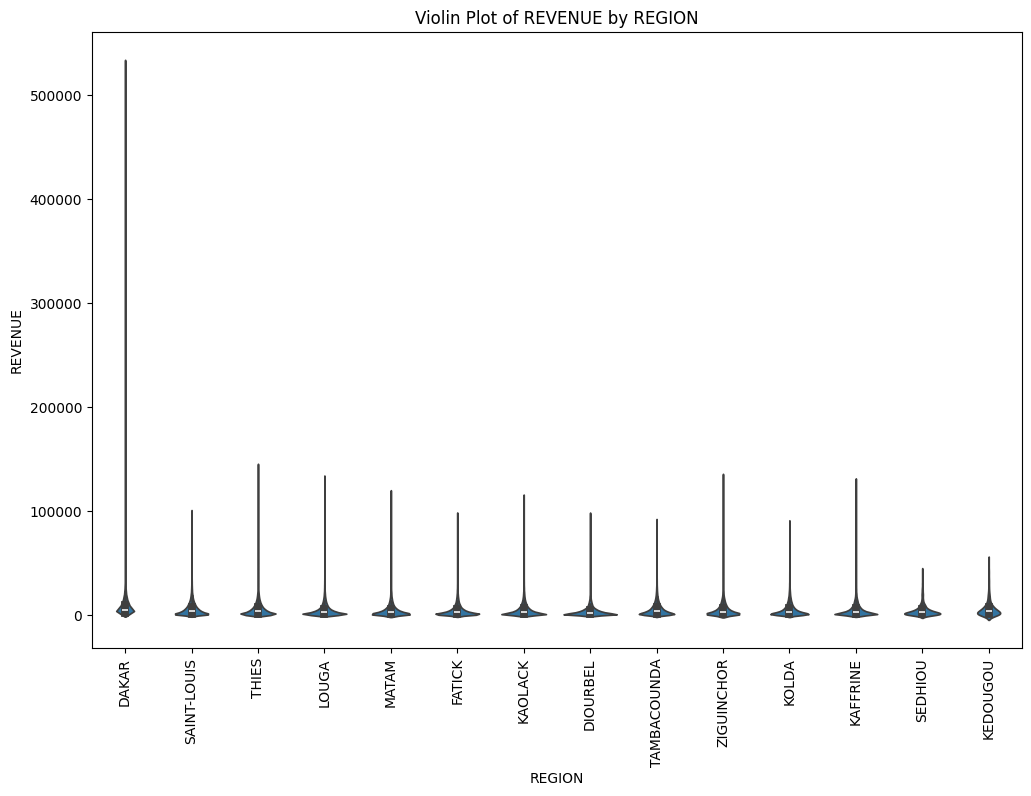

In [18]:
# Example: Violin plot of REVENUE by REGION
plt.figure(figsize=(12, 8))
sns.violinplot(x='REGION', y='REVENUE', data=df)
plt.title('Violin Plot of REVENUE by REGION')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()


### Multivariate Analysis

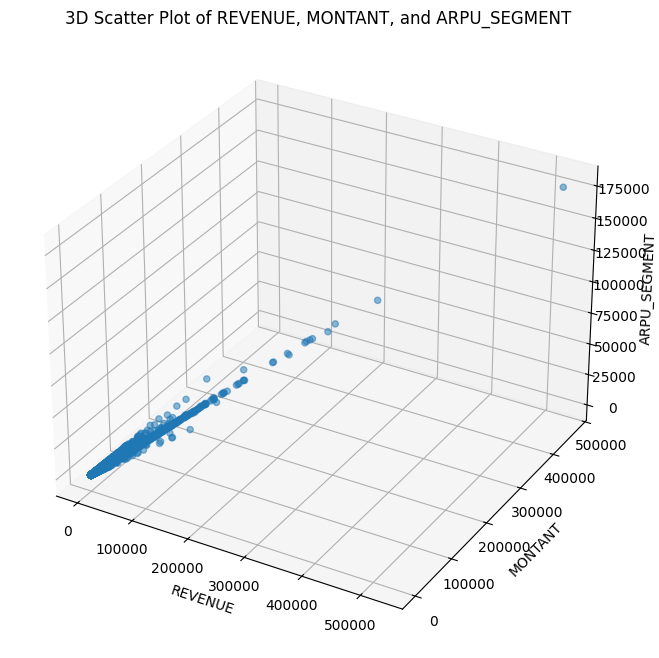

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Example: 3D scatter plot of REVENUE, MONTANT, and ARPU_SEGMENT
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['REVENUE'], df['MONTANT'], df['ARPU_SEGMENT'], alpha=0.5)
ax.set_xlabel('REVENUE')
ax.set_ylabel('MONTANT')
ax.set_zlabel('ARPU_SEGMENT')
plt.title('3D Scatter Plot of REVENUE, MONTANT, and ARPU_SEGMENT')
plt.show()


The 3D scatter plot of `REVENUE`, `MONTANT`, and `ARPU_SEGMENT` provides a visual representation of the relationship between these three variables. Here's what can be interpreted from the plot:

### Insights

1. **Positive Correlation**:
    - There is a clear positive correlation between `REVENUE` and `MONTANT`. As `MONTANT` (amount) increases, `REVENUE` tends to increase as well.
    - Similarly, there is a positive correlation between `REVENUE` and `ARPU_SEGMENT` (Average Revenue Per User Segment). Higher values of `ARPU_SEGMENT` are associated with higher revenues.

2. **Cluster of Low Values**:
    - A significant cluster of data points is concentrated near the lower values of `REVENUE`, `MONTANT`, and `ARPU_SEGMENT`. This indicates that the majority of the observations have low values for these features.

3. **Outliers**:
    - There are some distinct outliers with very high values for `REVENUE`, `MONTANT`, and `ARPU_SEGMENT`. These outliers are scattered away from the main cluster, suggesting a smaller group of high-revenue customers.

4. **Linear Trend**:
    - The scatter plot shows a linear trend, particularly between `REVENUE` and `MONTANT`, indicating a strong linear relationship. 


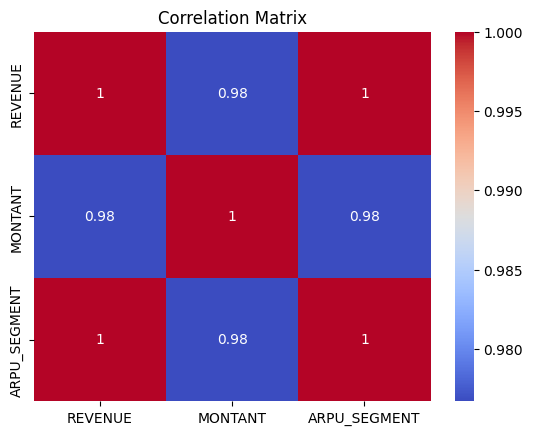

In [20]:


# Correlation matrix
correlation_matrix = df[['REVENUE', 'MONTANT', 'ARPU_SEGMENT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

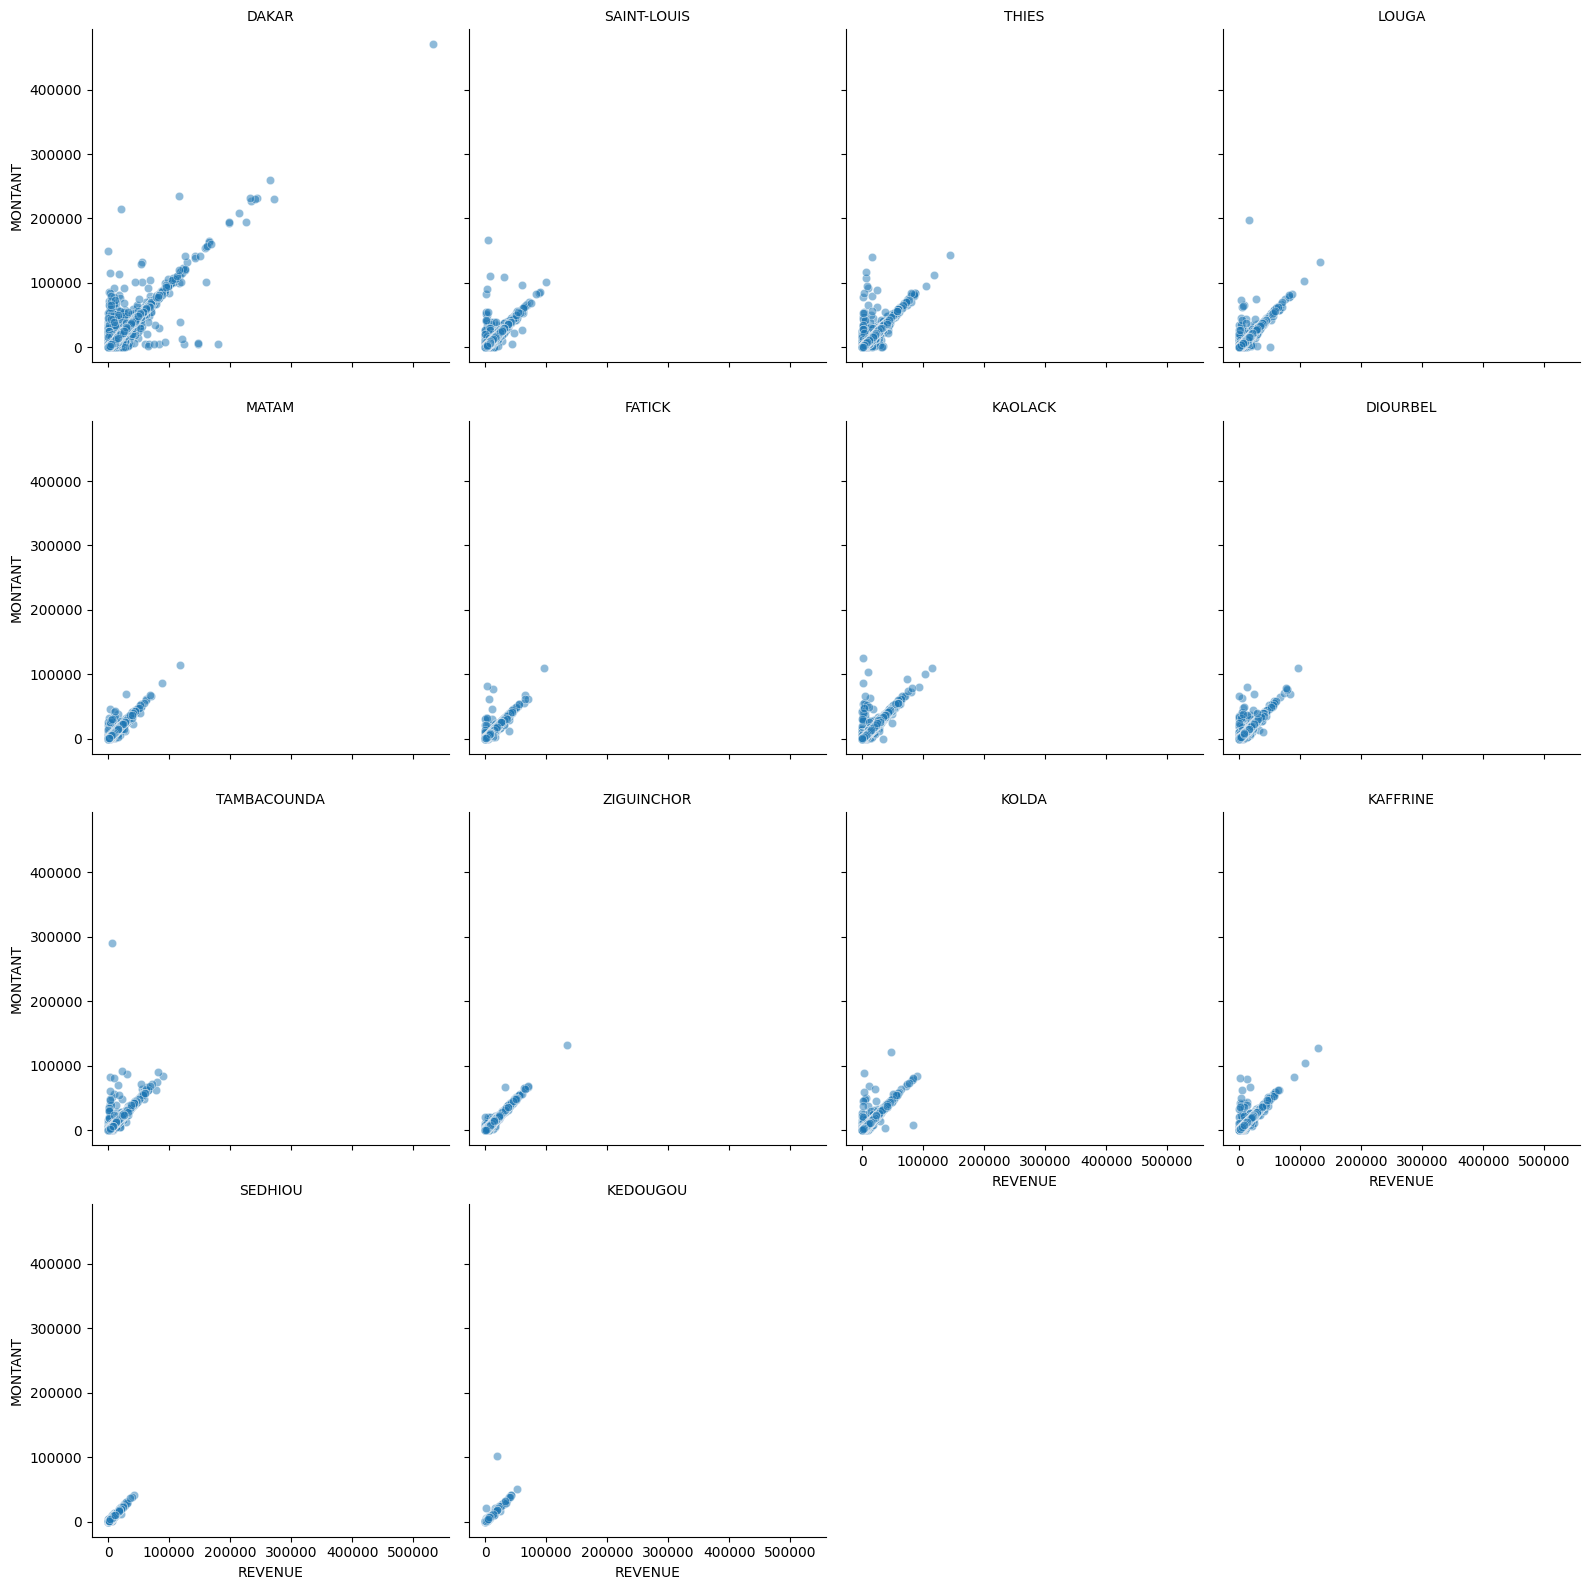

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Facet grid of REVENUE vs. MONTANT by REGION
g = sns.FacetGrid(df, col='REGION', col_wrap=4, height=4)
g.map(sns.scatterplot, 'REVENUE', 'MONTANT', alpha=0.5)
g.set_axis_labels('REVENUE', 'MONTANT')
g.set_titles(col_template="{col_name}")
plt.show()


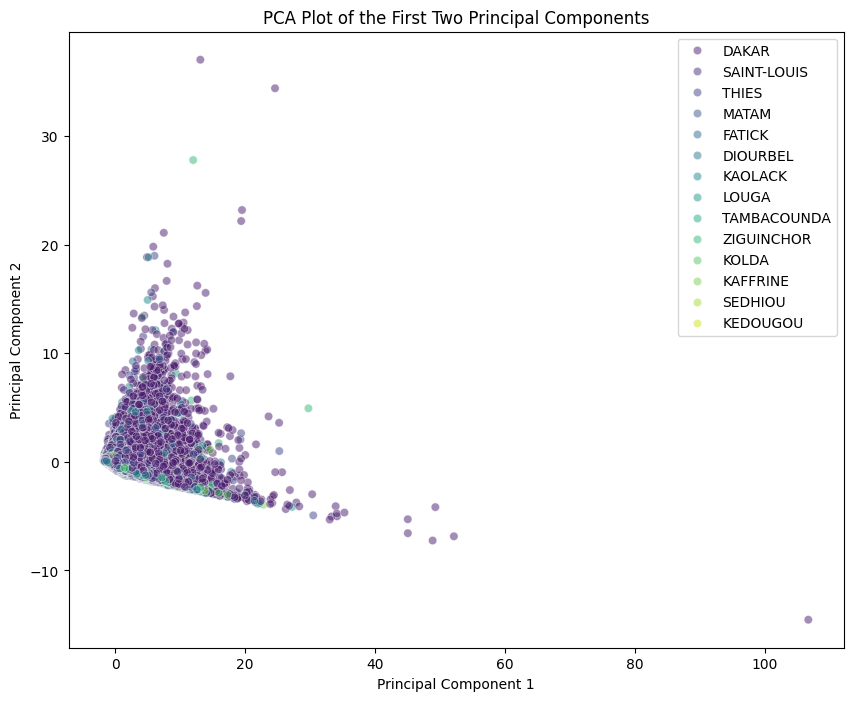

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select numerical features for PCA
features = ['REVENUE', 'MONTANT', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME']  # Example numerical features
X = df[features]

# Handle missing values
X = X.dropna()  # Drop rows with missing values in numerical features
df = df.loc[X.index]  # Filter the original DataFrame to match the rows

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['REGION'] = df['REGION'].values  # Add categorical feature for coloring

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='REGION', data=pca_df, palette='viridis', alpha=0.5)
plt.title('PCA Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()


### Summary from EDA


### 1. Handling Skewed Distributions
We'll apply log or square root transformations to normalize highly skewed features.

### 2. Addressing High Variability
We'll treat outliers and apply feature scaling to standardize the features.

### 3. Managing Target Imbalance
We'll use resampling techniques and algorithmic adjustments to manage the imbalance in the target variable.

### 4. Handling Missing Values
We'll impute missing values for both numerical and categorical features, and consider removing features with too many missing values.

### 5. Data Type Conversion
We'll convert `TENURE` and `MRG` to numeric types and encode categorical variables.

### 6. Exploratory Data Analysis (EDA)
We'll visualize missing data patterns and check data quality.

### 7. Feature Engineering
We'll create flags for missing data, aggregate features, and segment `regularity` into low and high categories.

### 8. Prepare Data for Modeling
We'll scale features and handle imbalance in the target variable.

Let's start by loading the dataset and inspecting the data to understand its structure and content.

Please provide the dataset or confirm if it's the same one you've been working on. If so, I can proceed with the necessary code implementations.

## Data Preprocessing

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.columns, axis=1)


In [24]:


# Custom transformer to drop columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.columns, axis=1)

# Custom transformer to convert data types
class ConvertToNumeric(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X[self.columns] = X[self.columns].apply(pd.to_numeric, errors='coerce')
        return X

# Data Preparation Pipeline
def build_preprocessing_pipeline():
    # Columns to drop
    columns_to_drop = ['user_id', 'ZONE1', 'ZONE2']

    # Numerical features and their transformations
    numerical_features = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 
                          'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 
                          'TENURE', 'MRG', 'FREQ_TOP_PACK']
    
    # Categorical features and their encoding
    categorical_features = ['REGION', 'TOP_PACK']

    # Pipeline for numerical features
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Imputation
        ('scaler', StandardScaler()),  # Scaling
        ('log_transform', FunctionTransformer(np.log1p, validate=True))  # Log transformation for skewed data
    ])

    # Pipeline for categorical features
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
    ])

    # Combine numerical and categorical pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features)
        ],
        remainder='passthrough'  # This will keep other columns not listed in numerical_features or categorical_features
    )

    # Full pipeline with column dropping and preprocessing
    pipeline = Pipeline(steps=[
        ('drop_columns', DropColumns(columns=columns_to_drop)),
        ('convert_to_numeric', ConvertToNumeric(columns=numerical_features)),
        ('preprocessor', preprocessor)
    ])

    return pipeline

# Example usage
preprocessing_pipeline = build_preprocessing_pipeline()

# Splitting the data
X = df.drop('CHURN', axis=1)
y = df['CHURN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42)
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    # Create a full pipeline with preprocessing and model
    full_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])
    
    # Train the model
    full_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = full_pipeline.predict(X_test)
    y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performance[name] = {
        'pipeline': full_pipeline,
        'auc': auc,
        'classification_report': report
    }

# Display performance
for name, performance in model_performance.items():
    print(f"Model: {name}")
    print(f"AUC: {performance['auc']}")
    print("Classification Report:")
    print(performance['classification_report'])
    print("\n")

# Extract AUCs and sort models by AUC
aucs = {name: performance['auc'] for name, performance in model_performance.items()}
sorted_models = sorted(aucs, key=aucs.get, reverse=True)

# Select top 3 models
top_3_models = sorted_models[:3]
print("Top 3 Models:")
for model in top_3_models:
    print(f"{model}: AUC = {aucs[model]}")




[LightGBM] [Info] Number of positive: 16297, number of negative: 357272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 373569, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.043625 -> initscore=-3.087516
[LightGBM] [Info] Start training from score -3.087516
Model: RandomForest
AUC: 0.8610408080934414
Classification Report:
{'0': {'precision': 0.9576567937681144, 'recall': 0.9963009875242398, 'f1-score': 0.9765967499148474, 'support': 89213.0}, '1': {'precision': 0.43103448275862066, 'recall': 0.05980861244019139, 'f1-score': 0.10504201680672269, 'support': 4180.0}, 'accuracy': 0.9543863030419839, 'macro avg': {'precision': 0.6943456382633675, 'recall': 0.5280547999822156, 'f1-score': 0.540819383360785, 'support': 93393.0}, 'weighted avg': {'precision'

In [27]:
import joblib
import os

# Ensure the 'best_models' folder exists
os.makedirs('../best_models', exist_ok=True)

# Save each model's pipeline to the 'best_models' folder
for model in top_3_models:
    filepath = os.path.join('../best_models', f'{model}_pipeline.joblib')
    joblib.dump(model_performance[model]['pipeline'], filepath)
